In [49]:
# Step 1 Load Dataset and Import Libraries
# ----------------------------------------------

import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics
from keras.layers import Input, Dense, Dropout
from keras.layers import Dense
from keras.models import Model, load_model

In [50]:
# Step 2 Check working directory and read dataset
# --------------------------------------------------

wd = os.getcwd()
print(wd)
os.chdir('/Users/sylviachadha/Desktop/Thesis/Datasets')

df = pd.read_csv('sine_synthetic.csv')
print(df.head())
print(len(df))



/Users/sylviachadha/Desktop/Thesis/Datasets
   time     value
0  0.00  0.000000
1  0.01  2.938926
2  0.02  4.755283
3  0.03  4.755283
4  0.04  2.938926
101


In [51]:
# Step 3 Split into train and test dataframe
# ------------------------------------------------

df_train, df_test = np.split(df, [int(0.7 * len(df))])

# Length of dataframes
df_train_len = len(df_train)
df_test_len = len(df_test)

print(df_train_len)
print(df_test_len)


70
31


In [52]:
# Step 4 Define Custom Functions Used
# -------------------------------------------------


def plot_sine_wave(y, legend):
    ax = y.plot(figsize=(12, 6),
                title='Sine Wave Amplitude = 5, Freq = 10Hz, Period = 0.1sec, Sampling freq-100Hz', label=legend)
    xlabel = 'time-sec'
    ylabel = 'amplitude'
    ax.set(xlabel=xlabel, ylabel=ylabel)
    plt.axhline(y=0, color='k')
    return plt

In [53]:
# Step 5 Preparing train sequences
# -------------------------------------------------

train_seq = df_train['value']
train_seq_array = (train_seq.to_numpy())

print(len(train_seq))
print(len(train_seq_array))

n = 0
step_size = 10

total_subsequences = math.floor(len(train_seq_array) / step_size)
print("Total_train_subsequences", total_subsequences)
total_data_points = total_subsequences * step_size
print("Total_train_points", total_data_points)

array_tuple = []
while n < total_data_points:
    subsequence = (train_seq_array[n:n + step_size])
    print(subsequence)
    n = n + step_size
    print(n)
    array_tuple.append(subsequence)

# Combining all sequences into 1 single train array
# array_tuple = (array1, array2, array3)
# arrays = np.vstack(array_tuple)

train_X = np.vstack(array_tuple)



70
70
Total_train_subsequences 7
Total_train_points 70
[ 0.00000000e+00  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  6.13000000e-16 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
10
[-1.23000000e-15  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  1.84000000e-15 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
20
[-2.45000000e-15  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  3.06000000e-15 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
30
[-3.68000000e-15  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  4.29000000e-15 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
40
[-4.90000000e-15  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  5.51000000e-15 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
50
[-6.13000000e-15  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  3.09000000e-13 -2.93892626e

In [54]:
# Step 6 Preparing test sequences
# -------------------------------------------------

test_seq = df_test['value']
test_seq_array = (test_seq.to_numpy())

print(len(test_seq))
print(len(test_seq_array))
# Need to ensure that it is taking first 10 points only

n = 0
step_size = 10

total_subsequences_test = math.floor(len(test_seq_array) / step_size)
print("Total_test_subsequences", total_subsequences_test)
total_data_points_test = total_subsequences_test * step_size
print("Total_test_points", total_data_points_test)

# So choose to create test sequences only with those many points

array_tuple = []
while n < total_data_points_test:
    subsequence_test = (test_seq_array[n:n + step_size])
    print(subsequence_test)
    n = n + step_size
    print(n)
    array_tuple.append(subsequence_test)

test_X = np.vstack(array_tuple)



31
31
Total_test_subsequences 3
Total_test_points 30
[-3.28000000e-13  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  6.31000000e-13 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
10
[-6.14000000e-13  2.93892626e+00  4.75528258e+00  4.75528258e+00
  3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
  7.00000000e+00 -2.93892626e+00]
20
[-6.15000000e-13  2.93892626e+00  4.75528258e+00  4.75528258e+00
  2.93892626e+00  9.53000000e-13 -2.93892626e+00 -4.75528258e+00
 -4.75528258e+00 -2.93892626e+00]
30


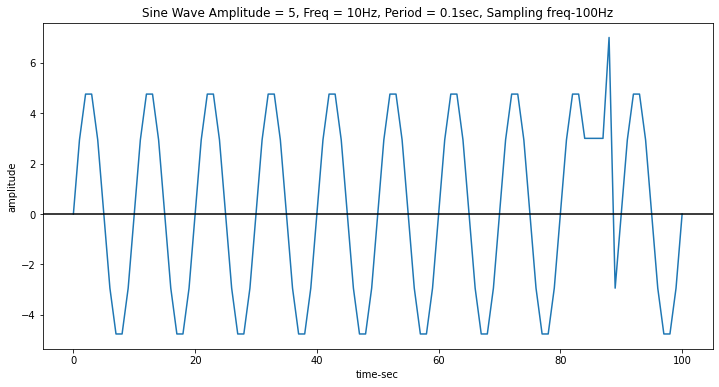

In [55]:
# Step 7 Visualize data with anomaly
# ----------------------------------------------------------------------------------

zz = plot_sine_wave(df['value'], "")
plt.show()


In [56]:
# Step 8 Autoencoder Neural N/W Learning / Model Training only on only Normal data
# Steps - a. Define architecture-> b. compile-> c. fit model on training data
# ----------------------------------------------------------------------------------

# 1 shape has 10 data points so when we feed the sequence of 10 data points
# Every data point goes as a feature now

# a. Model Architecture
# input layer
input_layer = Input(shape=(10,))

# encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

# latent view
latent_view = Dense(5, activation='sigmoid')(encode_layer3)

# decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

# output layer
output_layer = Dense(10)(decode_layer3)

model = Model(input_layer, output_layer)

model.summary()

# b. Model Compilation

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

nb_epoch = 30
learning_rate = 0.1

# c. Model fit on training data (X,X as reconstruction concept)
ae_nn = model.fit(train_X, train_X,
                  epochs=nb_epoch,
                  shuffle=False,
                  verbose=1)



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1500)              16500     
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_18 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 2505      
_________________________________________________________________
dense_20 (Dense)             (None, 500)               3000      
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              5010

In [57]:
# Step 9 AE prediction on Training data (which is only normal data)
# ---------------------------------------------------------------------------

# Predicted and actual arrays, need to flatten both because both are sequences of length 10
pred = model.predict(train_X)
pred_train = pred.flatten()

actual_train = train_X.flatten()

print(len(pred_train))
print(len(actual_train))




70
70


In [58]:
# Step 10 Change predicted and actual arrays to dataframe to see the plot
# and view actual & predicted values side by side by merging into 1 df
# ---------------------------------------------------------------------------

predicted_df = pd.DataFrame(pred_train)

actual_df = pd.DataFrame(actual_train)

# Merge two dataframes based on index

mergedDf = predicted_df.merge(actual_df, left_index=True, right_index=True)
print(len(mergedDf))
mergedDf
print(mergedDf.columns)
print(mergedDf.rename(columns={'0_x': 'predicted_train', '0_y': 'actual_train'}, inplace=True))
print(mergedDf.head())


70
Index(['0_x', '0_y'], dtype='object')
None
   predicted_train  actual_train
0         0.014284      0.000000
1         2.610230      2.938926
2         4.182856      4.755283
3         4.102333      4.755283
4         2.495841      2.938926


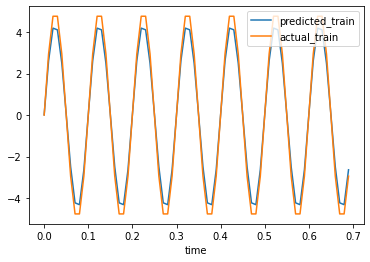

In [59]:
# Step 11 - Qualitative Check on Training Data
# Plot to see how well reconstructed data fits on actual data
# ---------------------------------------------------------------------------

# Add index which is df_train['time'] to merged df inorder to plot
mergedDf.index = df_train['time']
mergedDf.plot()
plt.show()


In [60]:
# Step 12 - Quantitative Check on Training Data
# ---------------------------------------------------------------------------
# Average mae or mse for the whole training data
# np.average to get 1 value for whole training set
mae_train = np.average(np.abs(mergedDf['actual_train'] - mergedDf['predicted_train']))
mse_train = np.average((mergedDf['actual_train'] - mergedDf['predicted_train']) ** 2)

print("mae for training data is", mae_train)
print("mse for training data is", mse_train)

# Individual absolute error calculation for all points in merged df
mergedDf['window_errors'] = abs(mergedDf['predicted_train'] - mergedDf['actual_train'])

# Sum of prediction errors on sliding/ fixed windows in merged df

n_steps = 10

total_train_points = len(mergedDf)
print(total_train_points)

total_train_cycles = round(total_train_points / n_steps)
print(total_train_cycles)

n = 0
Cycle_errors = list()
for i in range(1, total_train_cycles):
    i_train_cycle = mergedDf['window_errors'].iloc[n:n + n_steps]
    n = n + n_steps
    Sum_error_i_Cycle = sum(i_train_cycle)
    Cycle_errors.append(Sum_error_i_Cycle)

print(Cycle_errors)
Mean_window_error = statistics.mean(Cycle_errors)
print("Mean Training window error is", Mean_window_error)
print(mergedDf.head())

mae for training data is 0.377909458906096
mse for training data is 0.18368157451507444
70
7
[3.7790945060402463, 3.7790945060402463, 3.7790945060402463, 3.779094506040246, 3.7790945060402463, 3.779094506039944]
Mean Training window error is 3.7790945060401957
      predicted_train  actual_train  window_errors
time                                              
0.00         0.014284      0.000000       0.014284
0.01         2.610230      2.938926       0.328696
0.02         4.182856      4.755283       0.572427
0.03         4.102333      4.755283       0.652950
0.04         2.495841      2.938926       0.443085


In [61]:
# Step 12 - Extend Quantitative check
# 3 Standard deviation concept
window_std = statistics.stdev(Cycle_errors, xbar = Mean_window_error)
print("std dev", window_std)
window_threshold_u = Mean_window_error + (window_std*3)
window_threshold_l = Mean_window_error - (window_std*3)
print("window_threshold_u", window_threshold_u)
print("window_threshold_l", window_threshold_l)



std dev 1.234283625740806e-13
window_threshold_u 3.779094506040566
window_threshold_l 3.7790945060398253


In [62]:
# Step 13 - Neural N/W reconstruction on Test Data which contains Normal as well
# as abnormal pattern
# Expectation/Hypothesis - Abnormal pattern will give higher reconstruction error
# -------------------------------------------------------------------------------

# Predicted and actual arrays, need to flatten both because both are sequences of length 10
pred1 = model.predict(test_X)
pred_test = pred1.flatten()

actual_test = test_X.flatten()

print(len(pred_test))
print(len(actual_test))



30
30


In [63]:
# Step 14 - Change predicted and actual arrays to dataframe to see the plot
# ---------------------------------------------------------------------------
predicted_df_test = pd.DataFrame(pred_test)
actual_df_test = pd.DataFrame(actual_test)

# Merge two dataframes based on index

mergedDf_test = predicted_df_test.merge(actual_df_test, left_index=True, right_index=True)
print(len(mergedDf_test))
mergedDf_test
print(mergedDf_test.columns)
print(mergedDf_test.rename(columns={'0_x': 'predicted_test', '0_y': 'actual_test'}, inplace=True))
print(mergedDf_test.head())



30
Index(['0_x', '0_y'], dtype='object')
None
   predicted_test   actual_test
0        0.014284 -3.280000e-13
1        2.610230  2.938926e+00
2        4.182856  4.755283e+00
3        4.102333  4.755283e+00
4        2.495841  2.938926e+00


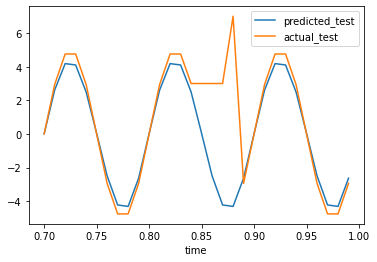

In [64]:
# Step 15 - Qualitative Check on Test Data
# ---------------------------------------------------------------------------
# Plot to see how well predicted test data fits on actual test data
#  new change
if len(df_test) != len(mergedDf_test):
    diff = (len(df_test) - len(mergedDf_test))
    new_df_test = df_test[:-diff]


mergedDf_test.index = new_df_test['time']
mergedDf_test.plot()
plt.show()


In [66]:
# Step 16 - Quantitative Check
# ---------------------------------------------------------------------------

# Individual absolute error calculation for each test point
mergedDf_test['window_errors'] = abs(mergedDf_test['predicted_test'] - mergedDf_test['actual_test'])
print(mergedDf_test)

# Sum of prediction errors on fixed windows of step size 10

# From test data preparation we know total subsequences and total data points
# and n_steps
# total_subsequences_test = math.floor(len(test_seq_array) / step_size)
# print("Total_test_subsequences", total_subsequences_test)

n = 0
Cycle_count = 0
for i in range(1, total_subsequences_test):
    i_test_cycle = mergedDf_test['window_errors'].iloc[n:n + n_steps]
    n = n + n_steps
    Sum_error_i_Cycle = sum(i_test_cycle)
    if Sum_error_i_Cycle > Mean_window_error:  # Condition to declare anomaly
        Cycle_count = Cycle_count + 1
        print("Anomalous Pattern Detected with sum of prediction errors in anomalous window as", Sum_error_i_Cycle)
        print("Anomalous window no ", i)

print('Total Patterns detected ', Cycle_count)


      predicted_test   actual_test  window_errors
time                                             
0.70        0.014284 -3.280000e-13       0.014284
0.71        2.610230  2.938926e+00       0.328696
0.72        4.182856  4.755283e+00       0.572426
0.73        4.102333  4.755283e+00       0.652950
0.74        2.495841  2.938926e+00       0.443085
0.75        0.034448  6.310000e-13       0.034448
0.76       -2.491291 -2.938926e+00       0.447635
0.77       -4.222757 -4.755283e+00       0.532526
0.78       -4.309677 -4.755283e+00       0.445605
0.79       -2.631489 -2.938926e+00       0.307437
0.80        0.014284 -6.140000e-13       0.014284
0.81        2.610227  2.938926e+00       0.328699
0.82        4.182851  4.755283e+00       0.572432
0.83        4.102327  4.755283e+00       0.652955
0.84        2.495837  3.000000e+00       0.504163
0.85        0.034448  3.000000e+00       2.965552
0.86       -2.491288  3.000000e+00       5.491288
0.87       -4.222752  3.000000e+00       7.222752
